# What does pre-industrial mean?

*I’m writing some [blog posts](https://concerningclimate.wordpress.com) on climate change mitigation. One of the issues that has come up is what temperature baseline I should use when looking at how much hotter it might get. This post explores that question. *

The [UN Paris Agreement on Climate Change](http://unfccc.int/paris_agreement/items/9485.php) aims to keep temperature rise this century to well below  2°C relative to pre-industrial levels. The agreement further promises to pursue efforts to limit the temperature increase to 1.5°C.  So what exactly are ‘pre-industrial levels’?

To get some more insight into how pre-industrial levels are defined, I turned to the Intergovernmental Panel for Climate Change (IPCC), the international body for assessing the science related to climate change.

Things proved to be more complicated than I’d anticipated. The IPCC frequently refer to pre-industrial levels in their work but, as far as I can see, they never define them. They use a variety of different baselines in [their reports](http://www.ipcc.ch/publications_and_data/publications_and_data_reports.shtml), most commonly: 1861–1880, 1850–1900 and 1986–2005. They state for example that ‘the period 1986–2005 is approximately 0.61 °C warmer than 1850–1900’ . They also say that ‘limiting total human-induced warming (accounting for both CO2 and other human influences on climate) to less than 2°C relative to the period 1861–1880 with a probability of > 66% would require total CO2 emissions from all anthropogenic sources since 1870 to be limited to about 2900 GtCO2 ’.  Apologies for the hideously long sentence.  The reference to 2°C in the latter sentence makes me think that perhaps they have decided that 1861–1880 is the pre-industrial baseline. But they never explicitly say.

In the absence of help from the IPCC let’s think about what would make a good baseline. We want a period of time which is climatologically similar to today – we wouldn’t want to pick an ice age, for instance – but one in which we can be sure that human influence has not played a major role. To assess when humans starting emitting a lot of CO2 I have plotted atmospheric CO2 concentration against time in the figure below.

In [25]:
#First we import the packages that we are going to need
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np

In [26]:
# Then we read in some data
# Monthly CO2 data measured in hawaii in ppm (mole fraction in dry air)
# From here: https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html
#Skip the initial rows which are notes
df_Co2_hawaii = pd.read_csv('Mauna Loa CO2 monthly mean data.txt', delim_whitespace = True, header = 70, index_col = 0,  skiprows = [71])

In [27]:
#Have a look at the data
df_Co2_hawaii

,#,decimal,average,interpolated,trend,#days
1958,3,1958.208,315.71,315.71,314.62,-1
1958,4,1958.292,317.45,317.45,315.29,-1
1958,5,1958.375,317.50,317.50,314.71,-1
1958,6,1958.458,-99.99,317.10,314.85,-1
1958,7,1958.542,315.86,315.86,314.98,-1
1958,8,1958.625,314.93,314.93,315.94,-1
1958,9,1958.708,313.20,313.20,315.91,-1
1958,10,1958.792,-99.99,312.66,315.61,-1
1958,11,1958.875,313.33,313.33,315.31,-1
1958,12,1958.958,314.67,314.67,315.61,-1


In [28]:
#define data to plot
x_CO2_hawai = list(df_Co2_hawaii['decimal'])
y_CO2_hawai = list(df_Co2_hawaii['interpolated'])

In [29]:
#import data from ice cores for last 2000 years
#Data from here: https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html
#Skip initial rows - they are notes
df_Co2_ice = pd.read_csv('lawdome_icecore_co2.txt', delim_whitespace = True, header = [143], index_col = 0, nrows = 2000)

In [30]:
#Have a look at the data
df_Co2_ice

,"(CH4spl,)","(GrwthRt,)","(NOAA04,)","(YearAD,)","(CO2spl,)","('GrwthRt',).1","('YearAD',).1","(N2Ospl,)","('GrwthRt',).2"
1,647.6,-0.5,655.5,1.0,276.7,0.1,1.0,264.2,-0.1
2,647.1,-0.5,655.0,2.0,276.8,0.1,2.0,264.1,-0.1
3,646.5,-0.5,654.4,3.0,276.8,0.1,3.0,264.1,-0.1
4,646.0,-0.5,653.9,4.0,276.9,0.1,4.0,264.0,-0.1
5,645.5,-0.5,653.4,5.0,276.9,0.1,5.0,264.0,-0.1
6,645.0,-0.5,652.9,6.0,277.0,0.1,6.0,263.9,-0.1
7,644.5,-0.5,652.3,7.0,277.1,0.1,7.0,263.8,-0.1
8,644.0,-0.5,651.8,8.0,277.1,0.1,8.0,263.8,-0.1
9,643.4,-0.5,651.3,9.0,277.2,0.1,9.0,263.7,-0.1
10,642.9,-0.5,650.8,10.0,277.2,0.1,10.0,263.7,-0.1


In [31]:
#Check what format the headers are in
df_Co2_ice.columns

Index([     (u'CH4spl',),     (u'GrwthRt',),      (u'NOAA04',),
            (u'YearAD',),      (u'CO2spl',), u'('GrwthRt',).1',
        u'('YearAD',).1',      (u'N2Ospl',), u'('GrwthRt',).2'],
      dtype='object')

In [32]:
#define data to plot
x_CO2_ice = list(df_Co2_ice[(u'YearAD',)])
y_CO2_ice = list(df_Co2_ice[(u'CO2spl',)])

In [33]:
#Set default parameters for plots
params = {'legend.fontsize': 20,
          'figure.figsize': (12, 12),
         'axes.labelsize': 20,
         'axes.titlesize':20,
         'xtick.labelsize':18,
         'ytick.labelsize':18}
pylab.rcParams.update(params)

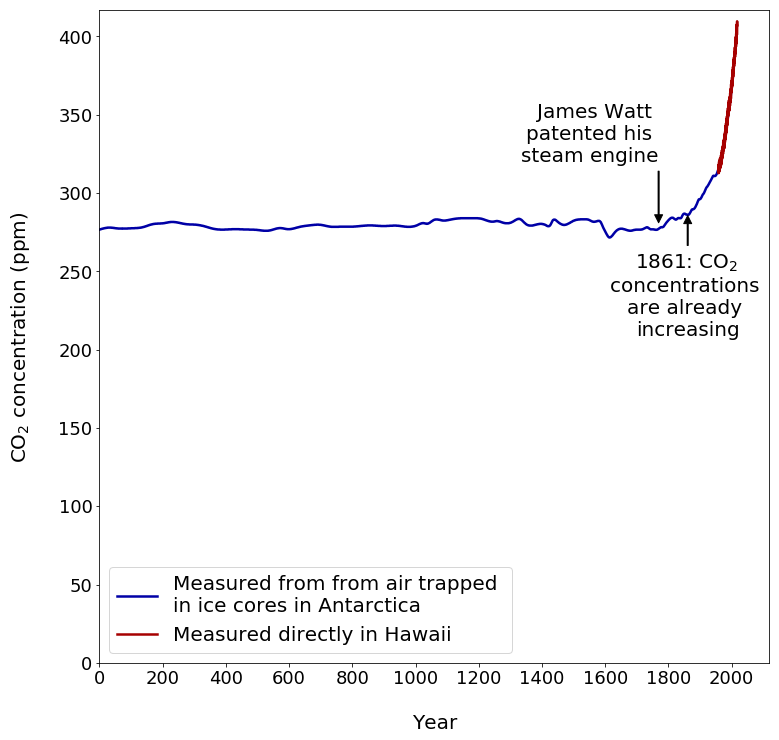

In [34]:
#CO2 concentration over time plot

#Set up the plot
fig_CO2_conc, ax_CO2_conc = plt.subplots()

#plot ice core data
ax_CO2_conc.plot(x_CO2_ice, y_CO2_ice, label = 'Measured from from air trapped \nin ice cores in Antarctica', color = (0, 0, 0.65), linewidth = 2.5)

#plot hawai data (from 1956)
ax_CO2_conc.plot(x_CO2_hawai, y_CO2_hawai, label = 'Measured directly in Hawaii', color = (0.65, 0, 0), linewidth = 2.5)

#Adjust minimum x and y values
pylab.xlim(xmin= 0)
pylab.ylim(ymin= 0)

#Add legend and annotations
ax_CO2_conc.legend(loc = 'lower left') 

ax_CO2_conc.annotate('James Watt \npatented his \nsteam engine',
            fontsize = 20,
            xy=(1769,y_CO2_ice[1768]+2),  # In the year 1769
            xytext=(1769, y_CO2_ice[1768] + 40), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05, width = 1, headwidth = 8, headlength = 8),
            horizontalalignment='right',
            verticalalignment='bottom')

ax_CO2_conc.annotate('1861: $\mathregular{CO_{2}}$ \nconcentrations \nare already \nincreasing',
            fontsize = 20,
            xy=(1861,y_CO2_ice[1860]+2), 
            xytext=(1861, y_CO2_ice[1860] - 80), 
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width = 1, headwidth = 8, headlength = 8),
            horizontalalignment='center',
            verticalalignment='bottom')
                      
# I'm leaving this out because it makes the figure fussy (but its interesting so I'm leaving it here for you)
#ax_CO2_conc.annotate('Possibly due to the arrival \nof Europeans in the Americas.\nThis lead to a catastophic decline \nin human numbers and hence mass \nabandonment of agricultural land.',
           # fontsize = 16,
           # style = 'italic',
           #xy=(1600,y_CO2_ice[1600]-2),  # In the year 1570
           # xytext=(1600, y_CO2_ice[1569] - 70), 
           # textcoords='data',
           # arrowprops=dict(facecolor='black', shrink=0.1, width = 1, headwidth = 8, headlength = 8, color = ('0.45')),
           # horizontalalignment='center',
           # verticalalignment='center')

#label axes and set x and y ticks
plt.xlabel('\nYear')
plt.ylabel('$\mathregular{CO_{2}}$ concentration (ppm) \n')
plt.xticks(np.arange(0, max(x_CO2_hawai)+10, 200))
plt.yticks(np.arange(0, max(y_CO2_hawai)+10, 50))


#plt.savefig('CO2_conc_hist.png')

                      

plt.show()

*Atmospheric CO2 concentration since 0 AD. The initial measurements (0 – 2000AD) are from air trapped in an ice core at [Law dome, Antartica](https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html).  The more recent data (1958 – present) were measured directly at [Mauna Loa, Hawaii](https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html). (If you are wondering what happened in 1600 you can read about it [here](http://www.nature.com/nature/journal/v519/n7542/box/nature14258_BX2.html))*

It looks like 1861–1880 would be a poor choice of baseline because greenhouse gas emissions were already increasing rapidly by this period. A [recent paper](http://journals.ametsoc.org/doi/10.1175/BAMS-D-16-0007.1)  suggested the period 1720–1800 would be a good candidate for the pre-industrial baseline. At that point anthropogenic (caused by people) greenhouse gas emissions had not yet taken off and levels of solar and volcanic activity were similar to today’s levels. Their analysis suggests that the period 1986–2005 was likely 0.55–0.8°C  warmer than their baseline period of 1720–1800.

In looking for ‘pre-industrial’ temperature data I found another problem, which in hindsight should have been obvious. There isn’t high quality temperature data for the pre-industrial period. The figure below shows the change in global mean temperatures since 1880. NASA only go back to 1880 in their global temperature analysis because they say that, before then, the quality of the data was too poor.

In [35]:
#Now let's look at global temperature data

# Nasa temperature data set originally from:https://climate.nasa.gov/system/internal_resources/details/original/647_Global_Temperature_Data_File.txt Accessed 31.08.17
# But I actually downloaded data from the above link: #giss_data - https://data.giss.nasa.gov/gistemp/ Accessed 31.08.17
df_temp_nasa = pd.read_csv('nasa_global_temp_rel_1951-1980.txt',
                           delim_whitespace = True,
                           index_col = 0,
                           header = None,
                           names = ['year', '1 year average', '5 year average'])

# I also looked at a berkeleyearth data set initially to check nasa data set is consistent. They are very similar.
#berkely data:http://berkeleyearth.org/data/ Accessed 31.08.92
df_temp_berkely = pd.read_csv('berkeley_average_global_temp.txt',
                              delim_whitespace = True,
                              index_col = 0,
                              header = None,
                              skiprows = 76 ,
                              names = [ 'year', 'month', 'month anomoly', 'month uncertainty', 'annual anomoly', 'annual uncertainty'],
                              nrows = 2010,
                              usecols = [0,1,2,3,4,5])
#Both data sets are temperature differentials relative to 1951-1980 average.

In [36]:
#Add a decimal time base to deal with months of the year. 
year_decimal = (np.linspace(1850.0,2017.4167, 2010))
df_temp_berkely_dec = df_temp_berkely.assign(year_dec = year_decimal )


In [37]:
#define variables to plot
x_temp = list(df_temp_nasa.index)
y_temp_1year = list(df_temp_nasa['1 year average'])
y_temp_5year = list(df_temp_nasa['5 year average'])
x_temp_berkely = list(df_temp_berkely_dec.loc[1851:2016, 'year_dec']) #included for initial data check.
y_temp_berkely = list(df_temp_berkely_dec.loc[1851:2016, 'annual anomoly']) #included for initial data check.


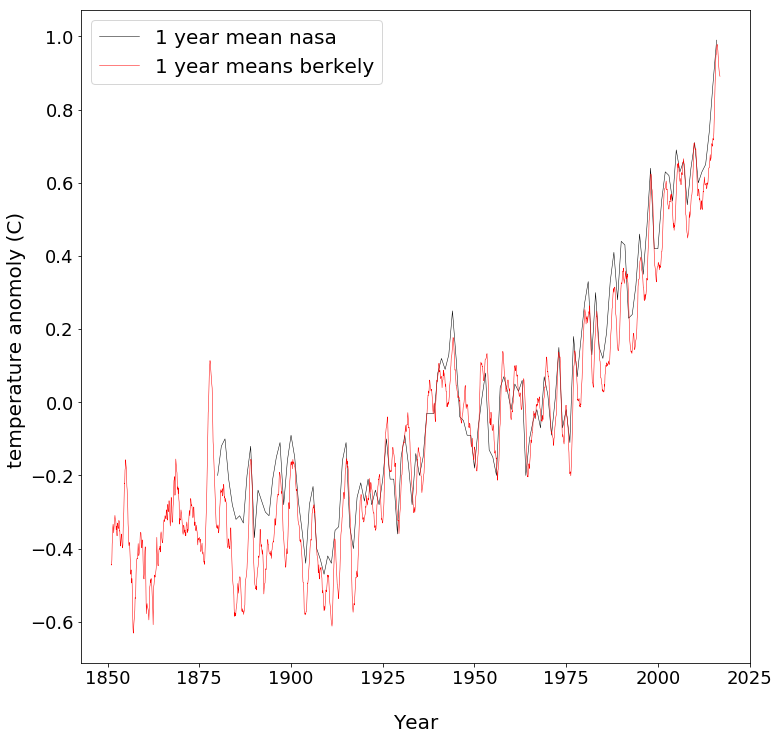

In [38]:
#Global temperature over time plot - anomolies. Both data sets relative to 1951-1980. 
#Some Difference is likely due to how scarcity of measurements over the sea is dealt with in different models. 

#Set up the plot
fig_temp_rel, ax_temp_rel = plt.subplots()

#plot annual mean
ax_temp_rel.plot(x_temp, y_temp_1year, label = '1 year mean nasa', linewidth = 0.5, color = '0')
ax_temp_rel.plot(x_temp_berkely, y_temp_berkely, label = '1 year means berkely', linewidth = 0.5, color = (1,0,0))


#Add legend and annotations
ax_temp_rel.legend() 

#label axes and set x and y ticks
plt.xlabel('\nYear')
plt.ylabel('temperature anomoly (C) ')                  
           
plt.show()

In [39]:
#These seem sufficiently similar to suggest that they are legitimate. I'll now just use the NASA one. 
#Add 14 degrees C - an estimate of the mean temperature between 1951 and 1980. 
#The value of the offset has some uncertainty but I think it is more intuitive to use absolute numbers.
#For detail on absolute temperatures and issues with using them see: https://data.giss.nasa.gov/gistemp/faq/abs_temp.html 

#uncertainties in relative temperatures about +/-0.05 in recent years and +/-0.1 around 1900
#Data not included before 1880 as lack of good data. 

y_temp_1year_abs = [x + 14 for x in y_temp_1year]
y_temp_5year_abs = [x + 14 for x in y_temp_5year]

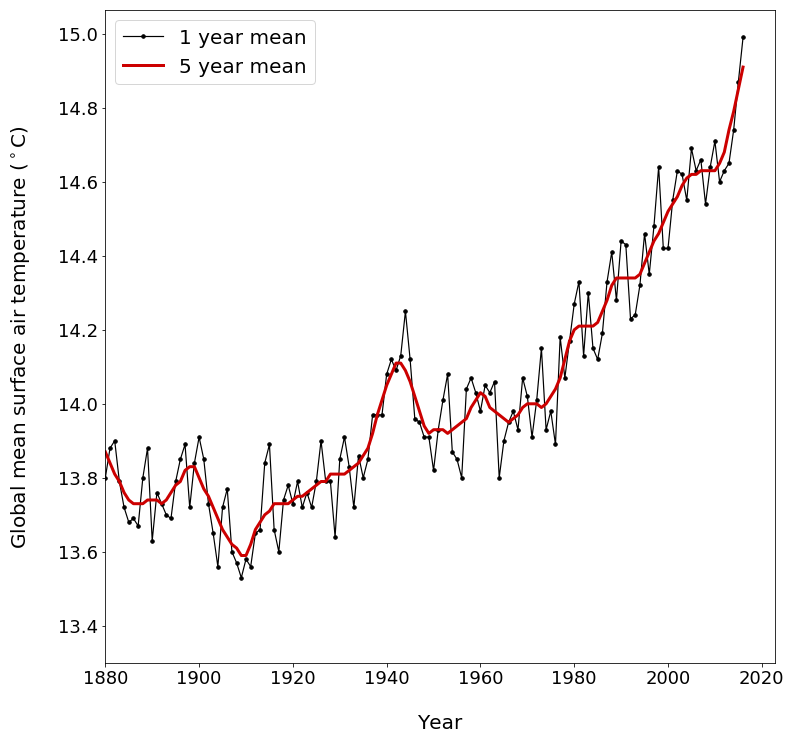

In [40]:
#Global temperature over time plot - absolute values

#Set up the plot
fig_temp, ax_temp = plt.subplots()

#plot annual and 5 year means
ax_temp.plot(x_temp, y_temp_1year_abs, label = '1 year mean', linewidth = 1.2, color = '0' , marker = '.', markersize = 7)
ax_temp.plot(x_temp, y_temp_5year_abs, label = '5 year mean', color = (0.8, 0, 0), linewidth = 3)

#Adjust axes so origin is where you want it
pylab.xlim(xmin= 1880)
pylab.ylim(ymin= 13.3)

#Add legend
ax_temp.legend() 

#label axes and set x and y ticks
plt.xlabel('\nYear')
plt.ylabel('Global mean surface air temperature ($^\circ$C) \n ')
plt.xticks(np.arange(1880, 2020.1, 20))
plt.yticks(np.arange(13.4, 15.1, 0.2))

#plt.savefig('temps_hist.png')                    
          
plt.show()

*Global mean surface temperatures from 1880 to present day. [Data](https://data.giss.nasa.gov/gistemp/) from 1880 onwards only because of decreasing data quality prior to that time.*

Perhaps the reason that the IPCC hasn’t been explicit is because there isn’t really a good solution for the ‘pre-industrial level’. You have to go pretty far back to ensure that humans haven’t already had an impact. But if you do that then you choose a period when humans weren’t that good at taking accurate global temperature measurements.

So it turns out that their isn't an easy answer. For simplicity I’m going to forget about ‘pre-industrial’ in most of my analysis and simply use the period 1986–2005 as a convenient baseline for which there is ample, high quality data. However if you want to translate the numbers for projected temperature increases relative to 1986–2005 to ‘relative to pre-industrial levels’ then you need to add an offset. According to the paper I mentioned earlier we need to add between 0.55 and 0.8°C.

All data accessed on 31.08.17